In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Load the cleaned data for each module
angular_data = pd.read_csv('Data/Angular.csv')
java_data = pd.read_csv('Data/Java.csv')
python_data = pd.read_csv('Data/Python_Flask.csv')
django_data = pd.read_csv('Data/Django.csv')
android_data = pd.read_csv('Data/Android.csv')
professional_data = pd.read_csv('Data/Professional Development.csv')
intro_data = pd.read_csv('Data/Intro_to_Software_Development.csv')

In [15]:
# Convert 'Prerequisite_Course_Connection__c' column to numeric
java_data['Prerequisite_Course_Connection__c'] = pd.to_numeric(java_data['Prerequisite_Course_Connection__c'], errors='coerce')
android_data['Prerequisite_Course_Connection__c'] = pd.to_numeric(android_data['Prerequisite_Course_Connection__c'], errors='coerce')
django_data['Prerequisite_Course_Connection__c'] = pd.to_numeric(django_data['Prerequisite_Course_Connection__c'], errors='coerce')
professional_data['Prerequisite_Course_Connection__c'] = pd.to_numeric(professional_data['Prerequisite_Course_Connection__c'], errors='coerce')


In [16]:

# Calculate correlation coefficients
def calculate_correlation(data, retention_rate):
    # Select the relevant metrics columns
    metrics_columns = ['mor_Attendance_Score__c', 'IP_Grade_Average__c', 'mor_Total_Activity_Time__c', 'Participations_Level__c', 'Page_Views_Level__c']
    metrics_data = data[metrics_columns]
    
    # Calculate the correlation coefficients
    correlation = metrics_data.corrwith(retention_rate)
    
    return correlation

In [17]:
# Calculate correlation for each module
angular_correlation = calculate_correlation(angular_data, java_data['Prerequisite_Course_Connection__c'])
java_correlation = calculate_correlation(java_data, android_data['Prerequisite_Course_Connection__c'])
python_correlation = calculate_correlation(python_data, django_data['Prerequisite_Course_Connection__c'])
android_django_correlation = calculate_correlation(android_data.append(django_data), professional_data['Prerequisite_Course_Connection__c'])

# Combine the correlation coefficients into a single DataFrame
correlation_data = pd.DataFrame({
    'Metric': ['Attendance', 'IP Grade Average', 'Total Activity Time', 'Participation Level', 'Page View Level'],
    'Angular': angular_correlation,
    'Java': java_correlation,
    'Python': python_correlation,
    'Android/Django': android_django_correlation
})

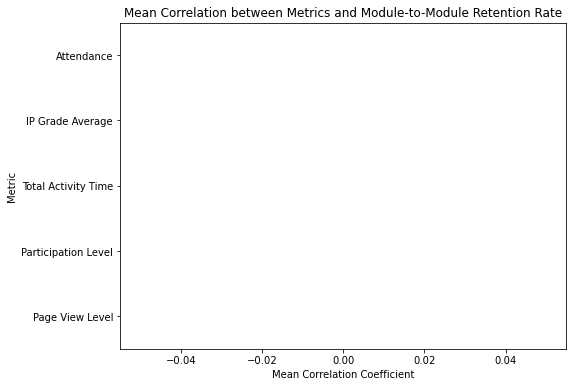

In [18]:

# Calculate the mean correlation across modules
correlation_data['Mean Correlation'] = correlation_data[['Angular', 'Java', 'Python', 'Android/Django']].mean(axis=1)

# Sort the DataFrame by mean correlation in descending order
sorted_correlation_data = correlation_data.sort_values(by='Mean Correlation', ascending=False)

# Visualize the mean correlation
plt.figure(figsize=(8, 6))
sns.barplot(x='Mean Correlation', y='Metric', data=sorted_correlation_data, orient='h')
plt.title('Mean Correlation between Metrics and Module-to-Module Retention Rate')
plt.xlabel('Mean Correlation Coefficient')
plt.ylabel('Metric')
plt.show()

In [19]:

# Select the top two metrics
top_metrics = sorted_correlation_data.head(2)['Metric']

# Print the top two metrics
print("Top Metrics to Improve Module-to-Module Retention:")
print(top_metrics)

Top Metrics to Improve Module-to-Module Retention:
mor_Attendance_Score__c          Attendance
IP_Grade_Average__c        IP Grade Average
Name: Metric, dtype: object
